### Granular - Technical Challenge

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
toy_fields_df = pd.read_csv('toy_fields.csv')
toy_orgs_df = pd.read_csv('toy_orgs.csv')
toy_yields_df = pd.read_csv('toy_yields.csv')

In [3]:
# rename organization_id to org_id
toy_orgs_df.columns = ['org/grower', 'org_id']

In [4]:
# merge toy_fields and toy_yields with toy_orgs
toy_yields_df = pd.merge(toy_yields_df, toy_orgs_df, how='inner', on='org_id')
toy_fields_df = pd.merge(toy_fields_df, toy_orgs_df, how='inner', on='org_id')

In [5]:
# drop org_id
toy_yields_df = toy_yields_df.drop('org_id', axis=1)
toy_fields_df = toy_fields_df.drop('org_id', axis=1)

### Question 1: 
- a) We expect yield data to have one yield per org, year, field

In [6]:
toy_yields_grouped = toy_yields_df.groupby(['org/grower','field_id', 'year']) 

In [7]:
toy_yields_grouped.filter(lambda x: x['crop_type'].count() > 1)

,crop_type,year,harvest_product,total_harvested,harvested_unit,field_id,org/grower
59,CROP.CORN.COMMERCIAL,2015,grain,43573.954100,bu,315645c27aa18fb735ae335b0e42692ac62e0558,Dudley Farm
61,CROP.CORN.COMMERCIAL,2015,grain,36016.714610,bu,c81eabfac15c03c8867033b500b510272b22d621,Dudley Farm
73,CROP.CORN.COMMERCIAL,2015,grain,24960.581550,bu,790456c61a24b82fdf2acd866fe9722919cb6358,Dudley Farm
78,CROP.CORN.COMMERCIAL,2015,grain,11316.289800,bu,c81eabfac15c03c8867033b500b510272b22d621,Dudley Farm
79,CROP.CORN.COMMERCIAL,2015,grain,52085.596640,bu,c81eabfac15c03c8867033b500b510272b22d621,Dudley Farm
93,CROP.CORN.COMMERCIAL,2015,grain,12504.097560,bu,315645c27aa18fb735ae335b0e42692ac62e0558,Dudley Farm
97,CROP.SOYBEAN.COMMERCIAL,2015,grain,17761.341890,bu,790456c61a24b82fdf2acd866fe9722919cb6358,Dudley Farm
145,CROP.CORN.COMMERCIAL,2017,grain,78558.630970,bu,b578e6be1ede28c8999d8d0da70ab8a80bdbcd53,Simmons Farm
220,CROP.CORN.COMMERCIAL,2017,grain,54412.251090,bu,b578e6be1ede28c8999d8d0da70ab8a80bdbcd53,Simmons Farm
253,CROP.CORN.COMMERCIAL,2015,grain,89396.309570,bu,17ba0791499db908433b80f37c5fbc89b870084b,Cavanaugh Farm


In [8]:
len(toy_yields_grouped.filter(lambda x: x['crop_type'].count() > 1))

48

### Question 1 contd. 
- b) We expect there to be one measure of area (acreage) per field

In [9]:
toy_fields_df.columns

Index(['field_id', 'year', 'field_area', 'field_area_unit', 'org/grower'], dtype='object')

In [10]:
dup_cnt, null_cnt = toy_fields_df.duplicated().sum(), toy_fields_df.isnull().sum().sum()
print("Number of Duplicate entries = %d, Missing entries = %d" % (dup_cnt, null_cnt))

Number of Duplicate entries = 0, Missing entries = 0


In [11]:
# making sure that no two orgs have the same field id

toy_fields_grouped = toy_fields_df.groupby(['org/grower', 'field_id'])

In [12]:
toy_fields_grouped.field_area.nunique()

org/grower    field_id                                
Austin Farm   0c090e104b85e5d305640f9d43f32d0a8c5faeb6    1
              0dd926eb22935abce9d072635fa3301d11ca51ad    1
              0ed36c4cebc9422c09599331d19995cf6410b513    1
              1a49329d95f4212cad1465abd97fe2b02b2d4e59    1
              3043cfa778d98f7970918f0f2958c4b6e9701c7d    1
              373b845a8eb362f8dd343300874f1cb424d3d62c    1
              3a7239737a3e4fd938314ee0546579a2071e0283    1
              3e9763bc48ac362d45ed6ea6a8035b7e515424ac    1
              3ecb07dfe2886a452d827ba5be310bef04548353    1
              4da7eb451613f4e33463ea474b2d24f51d0540ff    1
              5326c640348588b6c69ff9662ad0dfa6c2b1597f    1
              5f826cc116841bfdbca273cebb21f470e602c75f    1
              5ffe5f7993c967a9ec145605bb6bd6597f03b5e2    1
              62e2c677118c2b78f17c6ff57f42928173947564    1
              62ea71539dad5f47c46ab72672bcddecbe47b4e6    1
              641aa6a8dbbd287d0217dcfba9face3

In [13]:
len(toy_fields_grouped.filter(lambda x: x['field_area'].count() == 1))

181

### Question 2
Examine crop yield/harvest data quality

In [14]:
# checking for duplicate entries and missing values
dup_cnt, null_cnt = toy_yields_df.duplicated().sum(), toy_yields_df.isnull().sum().sum()
print("Number of Duplicate entries = %d, Missing entries = %d" % (dup_cnt, null_cnt))

Number of Duplicate entries = 0, Missing entries = 0


In [15]:
toy_yields_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 416
Data columns (total 7 columns):
crop_type          417 non-null object
year               417 non-null int64
harvest_product    417 non-null object
total_harvested    417 non-null float64
harvested_unit     417 non-null object
field_id           417 non-null object
org/grower         417 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 26.1+ KB


In [16]:
toy_yields_df.describe()

,year,total_harvested
count,417.000000,417.000000
mean,2015.640288,46845.564377
std,0.960823,35215.884157
min,2014.000000,190.133990
25%,2015.000000,17704.317250
50%,2015.000000,40381.649240
75%,2017.000000,67743.991590
max,2017.000000,170897.708500


In [17]:
toy_yields_df.columns

Index(['crop_type', 'year', 'harvest_product', 'total_harvested',
       'harvested_unit', 'field_id', 'org/grower'],
      dtype='object')

In [18]:
toy_yields_df.shape

(417, 7)

In [19]:
toy_yields_df.head()

,crop_type,year,harvest_product,total_harvested,harvested_unit,field_id,org/grower
0,CROP.CORN.COMMERCIAL,2016,grain,53290.628850,bu,cb1e3bd821dd673a0c378b16ba97075919aa993a,Austin Farm
1,CROP.SOYBEAN.COMMERCIAL,2015,grain,403.185902,bu,0c090e104b85e5d305640f9d43f32d0a8c5faeb6,Austin Farm
2,CROP.SOYBEAN.COMMERCIAL,2015,grain,27620.687600,bu,cb1e3bd821dd673a0c378b16ba97075919aa993a,Austin Farm
3,CROP.CORN.COMMERCIAL,2015,grain,41322.024800,bu,82de9e36652993a37ce5fbc55fa9033f425fb120,Austin Farm
4,CROP.SOYBEAN.COMMERCIAL,2015,grain,13638.816380,bu,3043cfa778d98f7970918f0f2958c4b6e9701c7d,Austin Farm


In [20]:
toy_yields_df.harvest_product.unique()

array(['grain'], dtype=object)

In [21]:
toy_yields_df.crop_type.value_counts()

CROP.CORN.COMMERCIAL       287
CROP.SOYBEAN.COMMERCIAL    130
Name: crop_type, dtype: int64

In [22]:
# renaming crop_type 
toy_yields_df['crop_type'] = toy_yields_df['crop_type'].replace(['CROP.CORN.COMMERCIAL', 'CROP.SOYBEAN.COMMERCIAL'], ['Corn','Soybean'])

In [24]:
toy_yields_df.year.unique()

array([2016, 2015, 2014, 2017])

In [25]:
# convert 'year' to str
toy_yields_df['year'] = toy_yields_df['year'].apply(str)

In [27]:
toy_yields_df['org/grower'].value_counts()

Simmons Farm        148
Cavanaugh Farm       82
Dudley Farm          51
Austin Farm          50
Depner Farm          34
Konecny Farm          8
Jenkins Farm          7
Odell Farm            6
Hawker Farm           5
Gregory Farm          4
Ross Farm             4
Flanagan Farm         3
Overholt Farm         3
Mull Farm             2
Seever Farm           2
Sifuentes Farm        2
Barrocas Farm         2
Carpentieri Farm      1
Stinson Farm          1
Crawford Farm         1
Batte Farm            1
Name: org/grower, dtype: int64

In [44]:
toy_yields_df.total_harvested.describe()

count       417.000000
mean      46845.564377
std       35215.884157
min         190.133990
25%       17704.317250
50%       40381.649240
75%       67743.991590
max      170897.708500
Name: total_harvested, dtype: float64

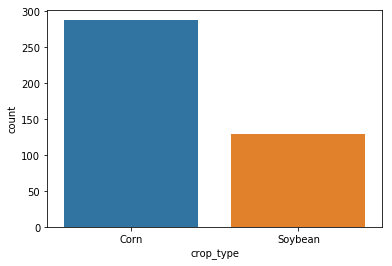

In [37]:
sns.countplot(x = toy_yields_df['crop_type'],
              data = toy_yields_df,
              order = toy_yields_df['crop_type'].value_counts().index)

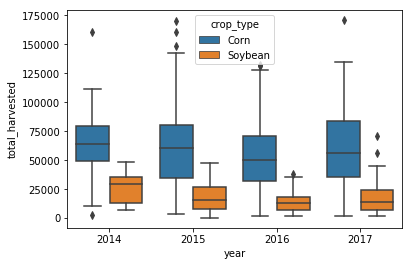

In [33]:
sns.boxplot(x="year", y="total_harvested", hue="crop_type", data=toy_yields_df)

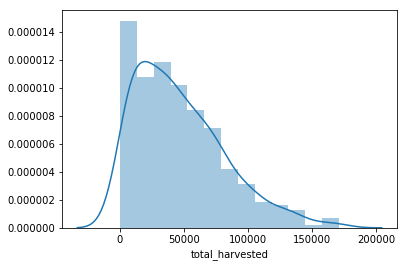

In [41]:
sns.distplot(toy_yields_df.total_harvested)

### EDA 

Ans to 1a: 
- Each field in a farm/org should have only 1 crop yield per year (either corn or soybean)
- There are 48 cases/rows where a single field is showing more than one crop yield

Ans. to 1b:
- Each field within a farm/org is expected to have a constant area
- In this dataset, there are 181 fields with a single measure of area
- The remaining fields show different areas for different years. Rounding the area does not help.  This column needs to be explored further.


Ans. to 2:
Data Quality:

- Completeness: Though there are no missing or duplicate records in the data set, the data is messy
- consistency, integrity, accuracy,  
    Here are a few areas to focus on in order to improve the quality of this data set
1) Crop Type
- The 'crop_type' feature shows two crops - corn or soybean. But the data values are of the form 'CROP.CORN.COMMERCIAL' and 'CROP.SOYBEAN.COMMERCIAL'. Transforming these to just the crop name would be beneficial for understanding and ease of analysis. 
- If there is a crop type other than commercial, that could be split into a separate feature, so that we can analyze the difference between commercially vs non-commercially grown crops

2) Harvest Product and Harvested Unit
- all products in this data set were tagged 'grain'. If the larger data which this data was part of, has harvest products other than 'grain', then it is valid to have such a column. Otherwise, this column can be dropped since it does not add any value to the data set
- The same goes for harvested unit. The entire column consists of one value 'bu'. If this is the standard and no other unit is part of the larger data that this sample is part of, this column can safely be dropped

3) Total Harvested
- This column contains numbers with around 5 decimal points. After understanding the context of the data, one could look into rounding off this feature's values to just the required number of decimal points
    
4) Field ID and Org ID
- Both field_id and org_id contain values that are too unwieldy. In this case, the toy_orgs table was available so that they could be mapped to the org_id for better analysis.
- The field_id did not carry any such information.
- It would be better to generate simpler IDs for these features to make them concise


- The total harvest is significantly higher for corn than for soybeans, in line with the number of fields growing each of these crops.